### This notebook performs Exploratory Data Analysis (EDA) on the Moodify Kaggle dataset

In [44]:
import pandas as pd
import numpy as np
import matplotlib as plt
import time as time
import random as random
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt

np.random.seed(10)

In [45]:
file_path = '../../datasets/278k_labelled_uri.csv'
moodify_data = pd.read_csv(file_path).drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)
moodify_data.head()


,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,uri
0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2,spotify:track:3v6sBj3swihU8pXQQHhDZo
1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1,spotify:track:7KCWmFdw0TzoJbKtqRRzJO
2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1,spotify:track:2CY92qejUrhyPUASawNVRr
3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0,spotify:track:11BPfwVbB7vok7KfjBeW4k
4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1,spotify:track:3yUJKPsjvThlcQWTS9ttYx


In [46]:
moodify_data

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,uri
0,195000.0,0.611,0.614,-8.815,0.0672,0.01690,0.000794,0.7530,0.520,128.050,3.446154e-07,2,spotify:track:3v6sBj3swihU8pXQQHhDZo
1,194641.0,0.638,0.781,-6.848,0.0285,0.01180,0.009530,0.3490,0.250,122.985,1.464234e-07,1,spotify:track:7KCWmFdw0TzoJbKtqRRzJO
2,217573.0,0.560,0.810,-8.029,0.0872,0.00710,0.000008,0.2410,0.247,170.044,4.007850e-07,1,spotify:track:2CY92qejUrhyPUASawNVRr
3,443478.0,0.525,0.699,-4.571,0.0353,0.01780,0.000088,0.0888,0.199,92.011,7.959809e-08,0,spotify:track:11BPfwVbB7vok7KfjBeW4k
4,225862.0,0.367,0.771,-5.863,0.1060,0.36500,0.000001,0.0965,0.163,115.917,4.693131e-07,1,spotify:track:3yUJKPsjvThlcQWTS9ttYx
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277933,276360.0,0.777,0.725,-9.012,0.0470,0.12600,0.010800,0.0917,0.851,128.349,1.700680e-07,1,spotify:track:6wLr2oR8eqUG5Beleh2Crm
277934,284773.0,0.543,0.482,-12.789,0.1940,0.08530,0.000092,0.1110,0.415,193.513,6.812444e-07,1,spotify:track:5mYtpXrZZ1bbGJYDGC8I0Y
277935,241307.0,0.527,0.942,-5.640,0.0366,0.01150,0.000000,0.1880,0.495,148.723,1.516740e-07,2,spotify:track:7FwBtcecmlpc1sLySPXeGE
277936,234333.0,0.768,0.829,-5.109,0.0313,0.09640,0.000029,0.0970,0.962,118.773,1.335706e-07,1,spotify:track:2olVm1lHicpveMAo4AUDRB


In [47]:
moodify_data = moodify_data.drop(['spec_rate','duration (ms)'], axis=1)


In [48]:
moodify_data.describe()


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,labels
count,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000
mean,0.552583,0.556866,-10.363654,0.087913,0.386583,0.255044,0.189217,0.449602,119.196002,1.179101
std,0.188905,0.279681,6.672049,0.112500,0.364504,0.373745,0.163596,0.267471,30.462256,1.021033
min,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.431000,0.342000,-12.747000,0.035900,0.033800,0.000000,0.096200,0.220000,95.072250,0.000000
50%,0.571000,0.591000,-8.397000,0.047100,0.262000,0.001090,0.121000,0.434000,119.940000,1.000000
75%,0.693000,0.792000,-5.842000,0.082200,0.754000,0.645000,0.227000,0.665000,138.869750,2.000000
max,0.989000,1.000000,4.882000,0.965000,0.996000,1.000000,1.000000,1.000000,244.947000,3.000000


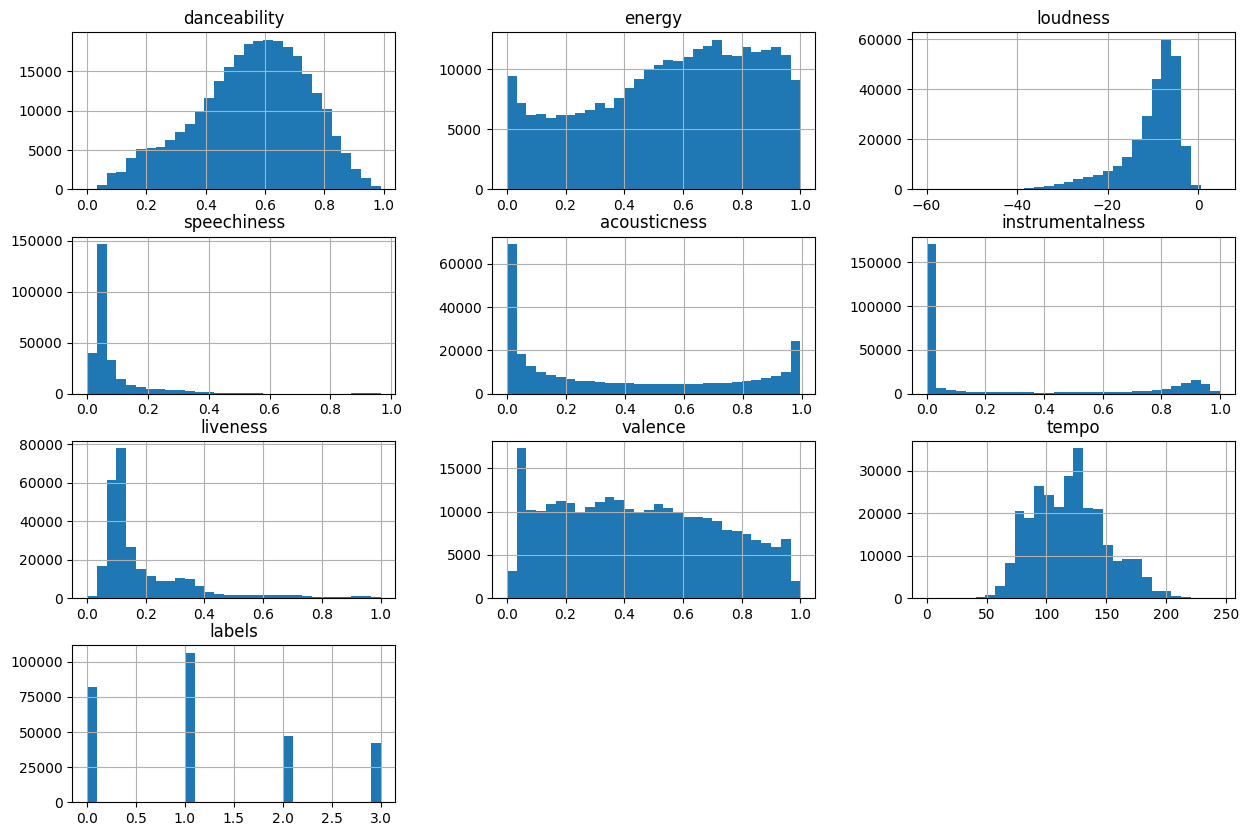

In [49]:
# fig=make_subplots(rows=3,cols=3,subplot_titles=('<i>danceability', '<i>energy', '<i>loudness', '<i>speechiness', '<i>acousticness', '<i>instrumentalness', '<i>liveness', '<i>valence', '<i>tempo'))
# fig.add_trace(go.Histogram(x=moodify_data['danceability'],name='danceability'),row=1,col=1)
# fig.add_trace(go.Histogram(x=moodify_data['energy'],name='energy'),row=1,col=2)
# fig.add_trace(go.Histogram(x=moodify_data['loudness'],name='loudness'),row=1,col=3)
# fig.add_trace(go.Histogram(x=moodify_data['speechiness'],name='speechiness'),row=2,col=1)
# fig.add_trace(go.Histogram(x=moodify_data['acousticness'],name='acousticness'),row=2,col=2)
# fig.add_trace(go.Histogram(x=moodify_data['instrumentalness'],name='instrumentalness'),row=2,col=3)
# fig.add_trace(go.Histogram(x=moodify_data['liveness'],name='liveness'),row=3,col=1)
# fig.add_trace(go.Histogram(x=moodify_data['valence'],name='valence'),row=3,col=2)
# fig.add_trace(go.Histogram(x=moodify_data['tempo'],name='tempo'),row=3,col=3)
# fig.update_layout(height=900,width=900,title_text='<b>Feature Distribution', title_x=0.5)
moodify_data.hist(bins=30, figsize=(15, 10))
plt.show()

In [50]:
import nbformat
nbformat.__version__

'5.10.4'

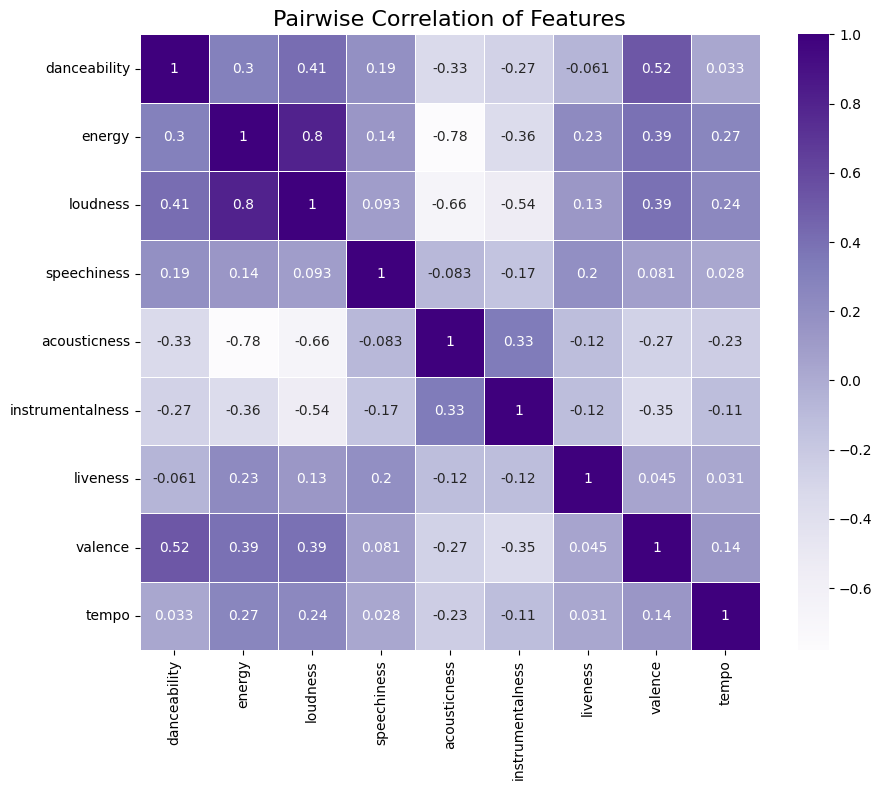

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_data = moodify_data.select_dtypes(include=['number']).drop(['labels'], axis=1)

# Compute the pairwise correlation matrix
corr_matrix = numeric_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap for the pairwise correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='Purples', linewidths=0.5)

# Add titles and labels
plt.title("Pairwise Correlation of Features", fontsize=16)
plt.show()


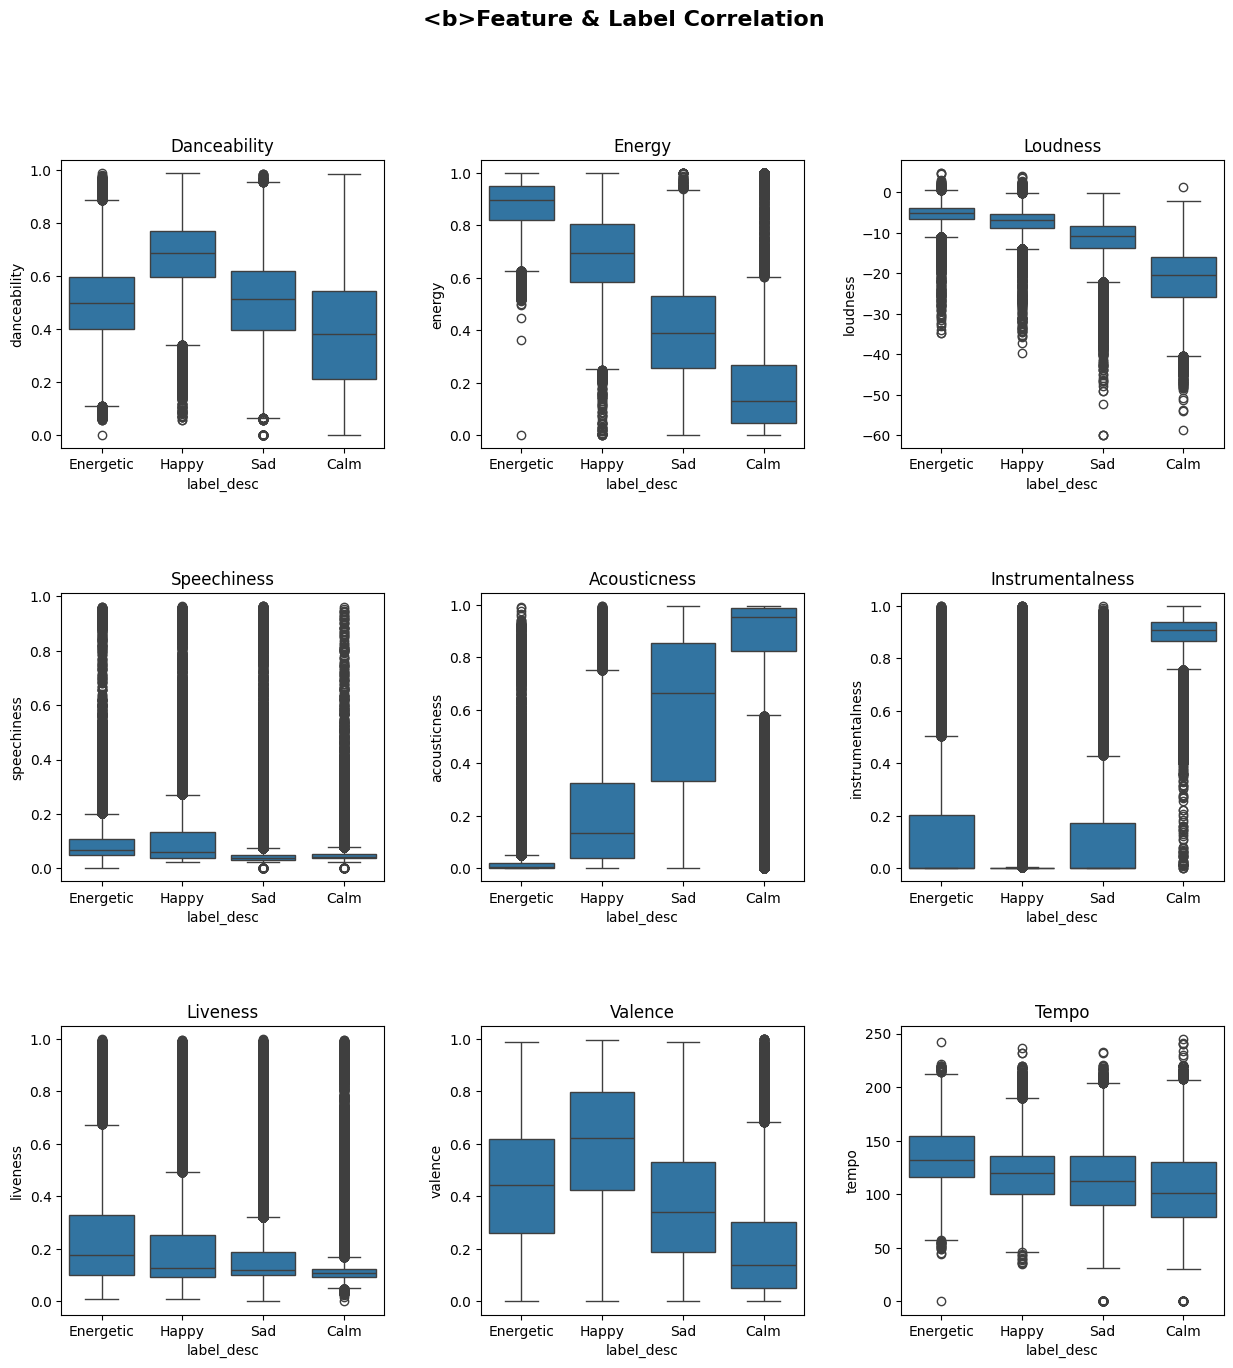

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a mapping for the labels
label_mapping = {0: 'Sad', 1: 'Happy', 2: 'Energetic', 3: 'Calm'}

# Map the labels to the new descriptive values
moodify_data['label_desc'] = moodify_data['labels'].map(label_mapping)

# Set up a grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Adjust space between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Create box plots for each feature and label
sns.boxplot(x="label_desc", y="danceability", data=moodify_data, ax=axes[0, 0])
sns.boxplot(x="label_desc", y="energy", data=moodify_data, ax=axes[0, 1])
sns.boxplot(x="label_desc", y="loudness", data=moodify_data, ax=axes[0, 2])
sns.boxplot(x="label_desc", y="speechiness", data=moodify_data, ax=axes[1, 0])
sns.boxplot(x="label_desc", y="acousticness", data=moodify_data, ax=axes[1, 1])
sns.boxplot(x="label_desc", y="instrumentalness", data=moodify_data, ax=axes[1, 2])
sns.boxplot(x="label_desc", y="liveness", data=moodify_data, ax=axes[2, 0])
sns.boxplot(x="label_desc", y="valence", data=moodify_data, ax=axes[2, 1])
sns.boxplot(x="label_desc", y="tempo", data=moodify_data, ax=axes[2, 2])

# Set titles for each subplot
axes[0, 0].set_title('Danceability')
axes[0, 1].set_title('Energy')
axes[0, 2].set_title('Loudness')
axes[1, 0].set_title('Speechiness')
axes[1, 1].set_title('Acousticness')
axes[1, 2].set_title('Instrumentalness')
axes[2, 0].set_title('Liveness')
axes[2, 1].set_title('Valence')
axes[2, 2].set_title('Tempo')

# Set a global title
fig.suptitle('<b>Feature & Label Correlation', fontsize=16, fontweight='bold')

# Show the plot
plt.show()

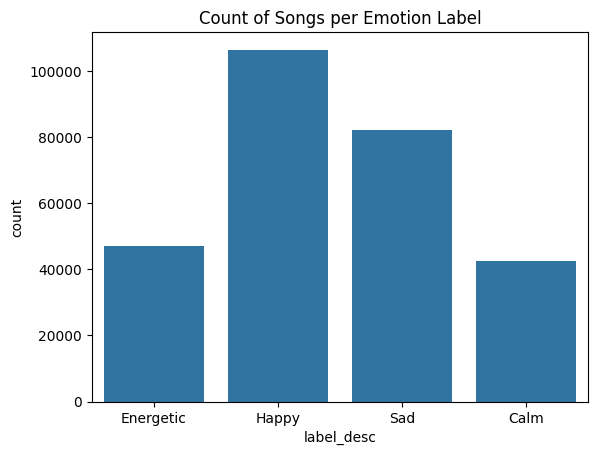

In [25]:
sns.countplot(x='label_desc', data=moodify_data)
plt.title('Count of Songs per Emotion Label')
plt.show()

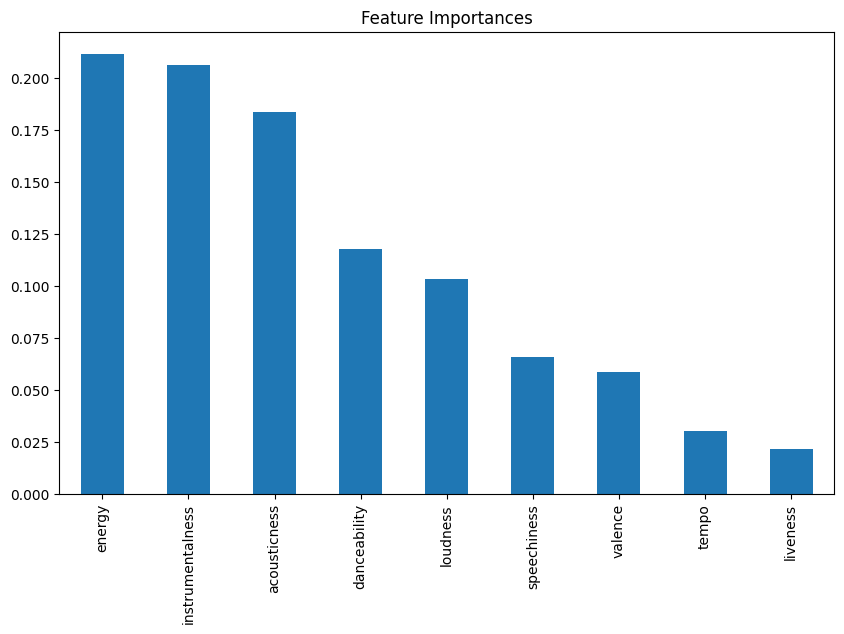

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = moodify_data.drop(columns=['labels', 'label_desc', 'uri'])  # Drop target and unnecessary columns
y = moodify_data['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances.plot(kind='bar', figsize=(10, 6), title="Feature Importances")
plt.show()

In [38]:
column_name = moodify_data.columns
print("Old Shape: ", moodify_data.shape)
print("Percentage of Outlier")
for i in range(10):
    Q1 = moodify_data[column_name[i]].quantile(0.25)
    Q3 = moodify_data[column_name[i]].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
 
    # Create arrays of Boolean values indicating the outlier rows
    upper_array = np.where(moodify_data[column_name[i]]>=upper)[0]
    lower_array = np.where(moodify_data[column_name[i]]<=lower)[0]
    
    print(column_name[i] + ": ", (len(upper_array) + len(lower_array))/len(moodify_data) * 100)

Old Shape:  (277938, 14)
Percentage of Outlier
danceability:  0.03238132245320899
energy:  0.0
loudness:  6.529873568925444
speechiness:  13.47386827278026
acousticness:  0.0
instrumentalness:  0.0
liveness:  7.342284970029287
valence:  0.0
tempo:  0.26804539141823
labels:  0.0
